In [19]:
import pandas as pdf
import numpy as np
import preprocess
import analysis.train_data_analysis 
import analysis.model_assessment

In [21]:
data = np.load('../train_no_clouds.npz')
refls = data['output_rfl']
wv = data['output_wv']
fids = data['output_idx']

values, counts = np.unique(fids, return_counts=True)
scenes = np.split(refls, 743)
wv_by_scene = np.split(wv, 743)
scenes = np.array(scenes)
wv_by_scene = np.array(wv_by_scene)

print(scenes.shape)
print(wv_by_scene.shape)

bad = []
for i in range(wv_by_scene.shape[0]):
    scene = wv_by_scene[i].copy()
    if scene[np.where((scene > 6) | (scene < 0))].shape[0] != 0:
        bad.append(i)

wv_by_scene = np.delete(wv_by_scene, bad, axis = 0)
scenes = np.delete(scenes, bad, axis = 0)
print(scenes.shape)
print(wv_by_scene.shape)

(743, 1242, 285)
(743, 1242)
(718, 1242, 285)
(718, 1242)


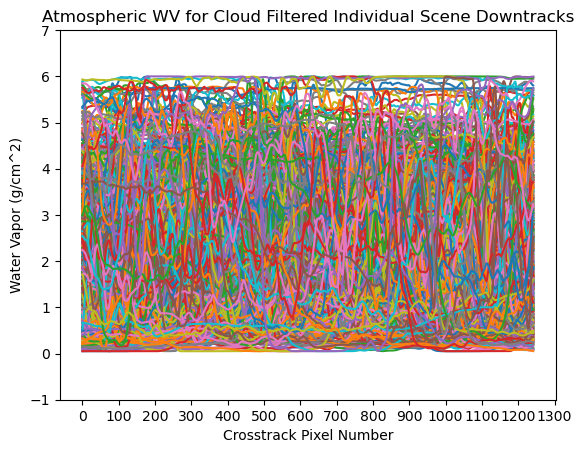

In [36]:
for i in range(wv_by_scene.shape[0]):
    plt.plot(wv_by_scene[i])
    plt.yticks(range(-1, 8))
    plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300])
    plt.ylabel('Water Vapor (g/cm^2)')
    plt.xlabel('Crosstrack Pixel Number')
    plt.title('Atmospheric WV for Cloud Filtered Individual Scene Downtracks');

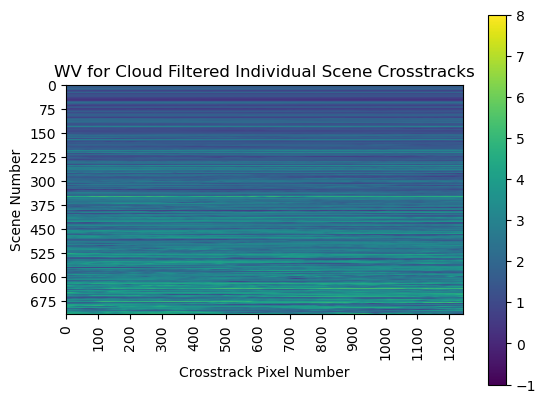

In [38]:
plt.imshow(wv_by_scene, vmin = -1, vmax = 8)
plt.colorbar()
yticks = range(0, 750, 75)
plt.yticks(yticks)
plt.xticks(range(0, 1300, 100), rotation = 'vertical')
plt.xlabel('Crosstrack Pixel Number')
plt.ylabel('Scene Number')
plt.title('WV for Cloud Filtered Individual Scene Crosstracks');

In [3]:
analysis.train_data_analysis.plot_overall_hist(wv_by_scene)

In [13]:
analysis.train_data_analysis.colorbar_all_crosstracks(wv_by_scene)

In [5]:
import matplotlib.pyplot as plt

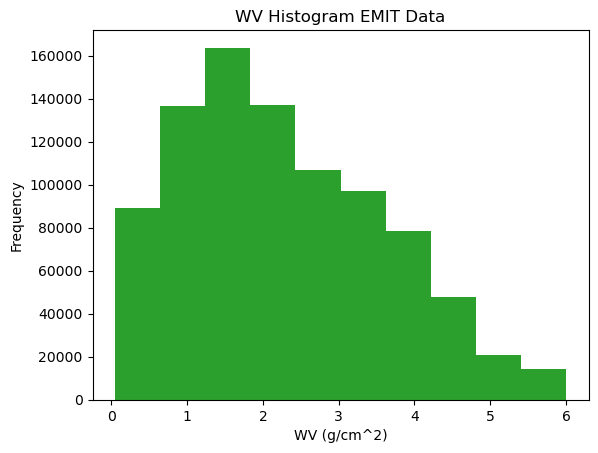

In [7]:
%matplotlib inline
plt.hist(wv_by_scene.flatten())
plt.xlabel('WV (g/cm^2)')
plt.ylabel('Frequency')
plt.title('WV Histogram EMIT Data')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_idx = np.random.choice(718, 100)
y_idx = X_idx
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.2, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()


print('X train: ', X_train.shape)
print('y train: ', y_train.shape)
print('X test: ', X_test.shape)
print('y test : ', y_test.shape)
print('X train index: ', X_train_idx) 
print('y train index: ', y_train_idx) 
print('X test index: ', X_test_idx) 
print('y test index: ', y_test_idx) 

X train:  (99360, 285)
y train:  (99360,)
X test:  (24840, 285)
y test :  (24840,)
X train index:  [130 476 366  40 647 372 491 458  91 251 520  52 161 241 492 243 474 385
 699 508 466 435 484 555 345 461 156 471 475 564  87 646 459 191 313  80
 614 187 427 128 201 702  34  21 102 600 214 401 387 561 454 295 337 252
 379 308 701 205 566 273 560 504 343  20 160 681 269   1 105 270 700 413
  14 565  71  64  58 330 343 166]
y train index:  [130 476 366  40 647 372 491 458  91 251 520  52 161 241 492 243 474 385
 699 508 466 435 484 555 345 461 156 471 475 564  87 646 459 191 313  80
 614 187 427 128 201 702  34  21 102 600 214 401 387 561 454 295 337 252
 379 308 701 205 566 273 560 504 343  20 160 681 269   1 105 270 700 413
  14 565  71  64  58 330 343 166]
X test index:  [455 270 276  99 686 562  13 130 339 387 661 389 216 663  20 106 189 315
 121 510]
y test index:  [455 270 276  99 686 562  13 130 339 387 661 389 216 663  20 106 189 315
 121 510]


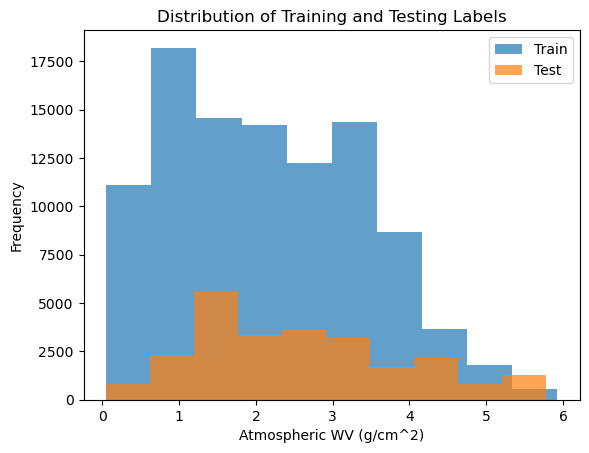

In [37]:
analysis.model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')

In [38]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

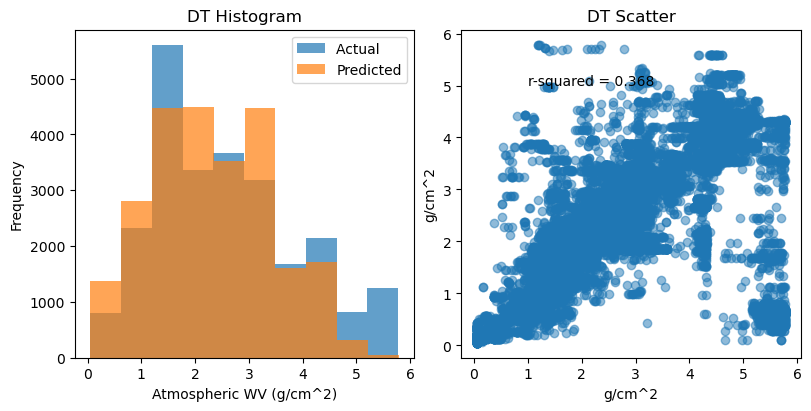

In [39]:
analysis.model_assessment.plot_hist_and_scatter(y_test, y_pred, 'DT Histogram', 'DT Scatter')

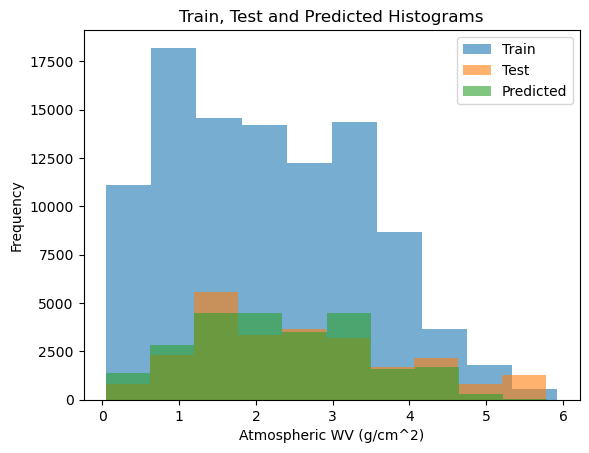

In [43]:
plt.hist(y_train, alpha = 0.6, label = 'Train')
plt.hist(y_test, alpha = 0.6, label = 'Test')
plt.hist(y_pred, alpha = 0.6, label = 'Predicted')
plt.xlabel('Atmospheric WV (g/cm^2)')
plt.ylabel('Frequency')
plt.title('Train, Test and Predicted Histograms')
plt.legend()

In [26]:
scenes.shape

(718, 1242, 285)

In [27]:
wv_by_scene.shape

(718, 1242)

(array([ 89338., 136648., 163653., 137136., 106694.,  96931.,  78639.,
         47699.,  20845.,  14173.]),
 array([0.04843143, 0.64353221, 1.23863299, 1.83373378, 2.42883456,
        3.02393534, 3.61903612, 4.2141369 , 4.80923768, 5.40433846,
        5.99943924]),
 <BarContainer object of 10 artists>)

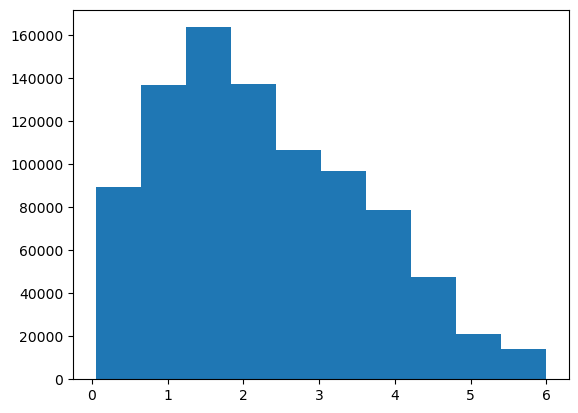

In [29]:
plt.hist(wv_by_scene.flatten())

In [30]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_idx = np.arange(718)
y_idx = X_idx
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.2, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()


print('X train: ', X_train.shape)
print('y train: ', y_train.shape)
print('X test: ', X_test.shape)
print('y test : ', y_test.shape)

X train:  (712908, 285)
y train:  (712908,)
X test:  (178848, 285)
y test :  (178848,)


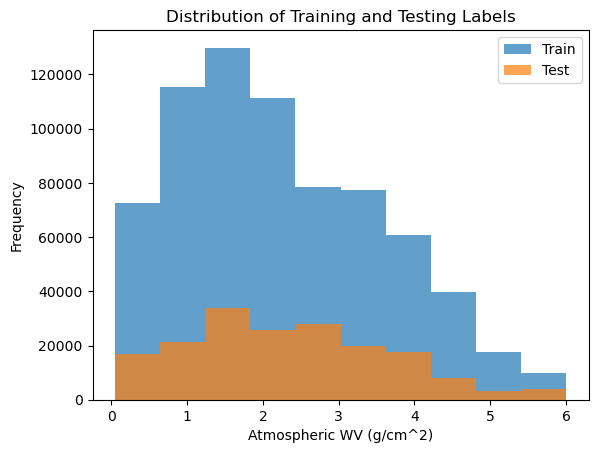

In [31]:
analysis.model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')